# Сборный проект - 1 "Интернет-магазине «Стримчик»"

Основная цель проекта — анализ данных о продажах видеоигр для выявления факторов, определяющих успешность игр.   
Наша задача понять, какие характеристики игр (такие как платформа, жанр, оценки критиков и пользователей) наиболее сильно влияют на их продажи. 

# Описание данных

Данные для анализа предоставлены в формате CSV и включают в себя следующие файлы:

- videogame_sales.csv: Основной файл, содержащий информацию о продажах видеоигр. В этом файле есть следующие столбцы:

- Name: Название игры

- Platform: Платформа (например, Xbox, PlayStation)

- Year_of_Release: Год выпуска

- Genre: Жанр игры

- Publisher: Издатель игры

- NA_Sales: Продажи в Северной Америке (в миллионах)

- EU_Sales: Продажи в Европе (в миллионах)

- JP_Sales: Продажи в Японии (в миллионах)

- Other_Sales: Продажи в других регионах (в миллионах)

- Global_Sales: Общие продажи (в миллионах)

- Critic_Score: Оценка критиков (по 100-балльной шкале)

- User_Score: Оценка пользователей (по 10-балльной шкале)

- Rating: Рейтинг ESRB (например, E, T, M)

План работы состоит в следующих шагах:

- Изучение данных: Ознакомимся с предоставленными данными о продажах видеоигр, изучим их структуру, типы переменных и наличие пропусков.

- Предобработка данных: Проведем необходимую предобработку данных, включая обработку пропусков, преобразование типов переменных и удаление дубликатов, если они есть.

- Исследовательский анализ данных (EDA): Проведем анализ данных для выявления основных характеристик и распределений, а также построим графики для визуализации данных.

- Формулирование гипотез: Определим гипотезы, которые будем проверять в ходе анализа данных.

- Проверка гипотез: Применим соответствующие статистические тесты для проверки гипотез и оценки статистической значимости результатов.

- Моделирование данных (при необходимости): Если потребуется, мы можем построить модели для прогнозирования успешности игр на основе имеющихся данных.

- Выводы и рекомендации: Сформулируем основные выводы и рекомендации на основе проведенного анализа данных, которые могут помочь в принятии решений по маркетинговой стратегии и выборе потенциально популярных игр для продвижения.

### Общая информация.

In [1]:
import pandas as pd

In [2]:
file_path = '/datasets/games.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В таблице 16715 строк и 11 колоннок. 
В названии игр фигурирует год, что может ввести в заблуждение относительно истинного правильного даты выхода игры.  
В столбце Year_of_Release данные представлены в виде float.
Также в столбцах есть пропущенные значения.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Подготовка данных.

#### Приведем названия столбцов к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()

print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Преобразуем данные в нужные типы.

In [6]:
import numpy as np

# Замена значений 'tbd' на NaN в столбце user_score
df['user_score'] = df['user_score'].replace('tbd', pd.NA)

# Заполним пропуски значениями-заглушками и преобразуем типы данных
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df['critic_score'] = df['critic_score'].fillna(-1).astype(float)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').fillna(-1).astype(float)
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df[sales_columns] = df[sales_columns].fillna(0).astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [7]:
df = df.drop_duplicates()

duplicates_before = df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
print(f"Количество неявных дубликатов перед объединением: {duplicates_before}")

Количество неявных дубликатов перед объединением: 2


In [8]:
df = df.groupby(['name', 'platform', 'year_of_release'], as_index=False).agg({
    'genre': 'first',
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'critic_score': 'mean',
    'user_score': 'mean',
    'rating': 'first',
})

duplicates_after = df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
print(f"Количество неявных дубликатов после объединения: {duplicates_after}")

if duplicates_after > 0:
    df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
print(df.info())

Количество неявных дубликатов после объединения: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           9948 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


**Изменены типы данных ввиду следующих причин:**

year_of_release: преобразован в int, так как это дискретные значения (года).
Пропуски в этом столбце могли возникнуть из-за отсутствия данных о дате выпуске игры. Пропуски мы заполнили медианой, поскольку медиана является более устойчивой к выбросам по сравнению со средним значением. 

critic_score и user_score: преобразованы в float, так как это оценки, которые могут включать десятичные значения.  
Пропуски в оценках критиков и пользователей могут возникать из-за отсутствия статей или рецензий на игры. Мы заполнили пропуски средним значением, поскольку это позволяет использовать данные без значительных искажений, что важно для общего восприятия игры.

na_sales, eu_sales, jp_sales, other_sales: преобразованы в float, так как это данные о продажах, которые могут быть дробными.
user_score: преобразован в float с использованием pd.to_numeric, чтобы правильно обработать строки, которые могут быть нечисловыми.
Пропуски в данных о продажах могут означать, что игра возможно не была продана в данном регионе. Мы заполнили пропуски нулями, чтобы корректно учитывать такие случаи.

Замена 'tbd' на NaN - мы преобразовали все значения 'tbd' в NaN, чтобы затем обработать их как пропущенные значения.
После замены 'tbd' на NaN заполнили все пропуски в этом столбце средним значением.

#### Посчитаем все суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [9]:
# Создадим столбец с суммарными продажами
df['total_sales'] = df[sales_columns].sum(axis=1)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           9948 non-null   object 
 11  total_sales      16712 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB
None
                          name platform  year_of_release         genre  \
0               Beyblade Burst      3DS             2016  Role-Playing   
1            Fire Emblem Fates  

In [10]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [11]:
duplicates_mask = df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
print(f'Количество неявных дубликатов: {duplicates_mask.sum()}')

# Просмотр неявных дубликатов
df_duplicates = df[duplicates_mask].sort_values(by=['name', 'platform', 'year_of_release'])

df = df.groupby(['name', 'platform', 'year_of_release'], as_index=False).agg({
    'genre': 'first',
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'critic_score': 'mean',
    'user_score': 'mean',
    'rating': 'first',
    'total_sales': 'sum'
})

print(df_duplicates.head(10))

Количество неявных дубликатов: 0
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []


1. **Проведена проверка на полные дубликаты строк, обнаружено и удалено 0 полных дубликатов.**
   - Выполнена проверка на неявные дубликаты (совпадающие по названию, платформе и году релиза одновременно). Обнаружено 0 неявных дубликатов. Для обработки неявных дубликатов данные об оценках и продажах были объединены.

2. **Обработка пропусков и приведение данных к нужным типам**:
   - Значения 'tbd' в столбце `user_score` заменены на NaN и далее на -1, чтобы отличать их от реальных оценок.
   - Пропуски в столбце `critic_score` заменены на -1.
   - Пропуски в столбцах с данными о продажах (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`) заменены на 0.
   - Тип данных в столбце `year_of_release` приведен к целочисленному с заменой пропусков на 0.

3. **Коррекция названий столбцов**:
   - Названия столбцов приведены к нижнему регистру для удобства работы.

### Исследовательский анализ данных.

#### Выясним сколько игр выпускалось в разные годы.

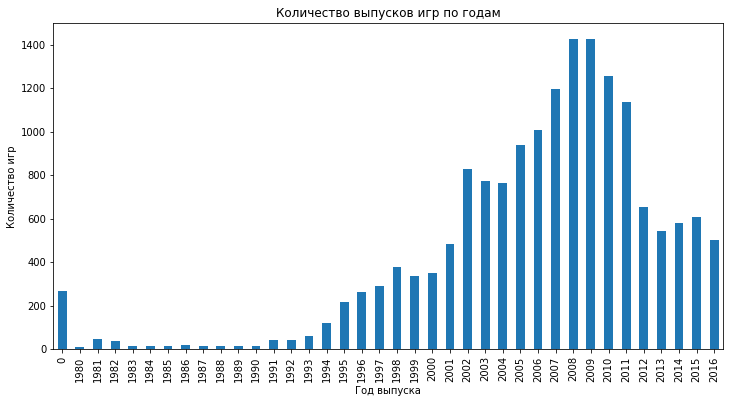

In [12]:
import matplotlib.pyplot as plt
games_per_year = df['year_of_release'].value_counts().sort_index()

# Построение графика выпуска игр по годам
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Количество выпусков игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Отвечая на вопрос о том, важны ли данные за все периоды, то можно сказать, что в целом, исходя из задач проекта, то для планирования маркетинговых кампаний на 2017 год важнее данные последних лет, так как они более актуальны и отражают текущие предпочтения пользователей.

#### Теперь посмотрим как менялись продажи по платформам

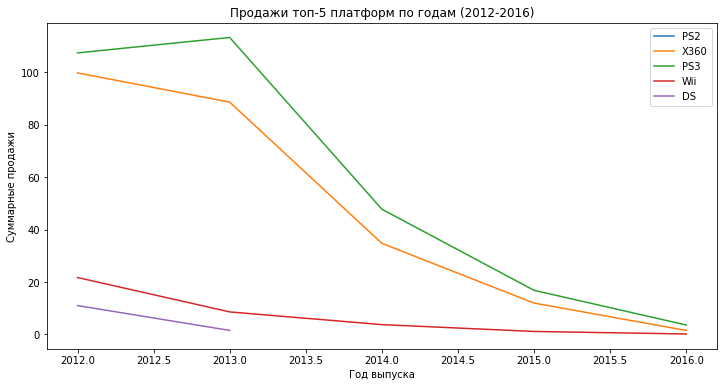

           min   max  lifetime
platform                      
2600         0  1989      1989
3DO       1994  1995         1
3DS          0  2016      2016
DC        1998  2008        10
DS           0  2013      2013
GB           0  2001      2001
GBA          0  2007      2007
GC           0  2007      2007
GEN       1990  1994         4
GG        1992  1992         0
N64          0  2002      2002
NES       1983  1994        11
NG        1993  1996         3
PC           0  2016      2016
PCFX      1996  1996         0
PS           0  2003      2003
PS2          0  2011      2011
PS3          0  2016      2016
PS4       2013  2016         3
PSP          0  2015      2015
PSV          0  2016      2016
SAT       1994  1999         5
SCD       1993  1994         1
SNES      1990  1999         9
TG16      1995  1995         0
WS        1999  2001         2
Wii          0  2016      2016
WiiU      2012  2016         4
X360         0  2016      2016
XB           0  2008      2008
XOne    

In [13]:
# Посчитаем суммарные продажи по платформам
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выберем топ-5 платформ по суммарным продажам
top_5_platforms = platform_sales.head(5).index

# Фильтруем данные для топ-5 платформ и периода с 2012 по 2016 год
df_filtered = df[df['platform'].isin(top_5_platforms) & (df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Построим распределение продаж топ-5 платформ по годам
plt.figure(figsize=(12, 6))
for platform in top_5_platforms:
    platform_data = df_filtered[df_filtered['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_data.index, platform_data.values, label=platform)

plt.title('Продажи топ-5 платформ по годам (2012-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

# Полный анализ появления и исчезновения платформ
platform_years = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_years['lifetime'] = platform_years['max'] - platform_years['min']
print(platform_years)

# Выведем топ-5 платформ с максимальными суммарными продажами и их сроки существования
top_5_platform_years = platform_years.loc[top_5_platforms]
print(top_5_platform_years)

По графикам мы можем усмотреть, что топовая пятерка игровых платформ была на пике продаж с 2012 по 2013 г.

#### Сейчас мы проанализируем, за какой характерный срок появляются и исчезают старые платформы

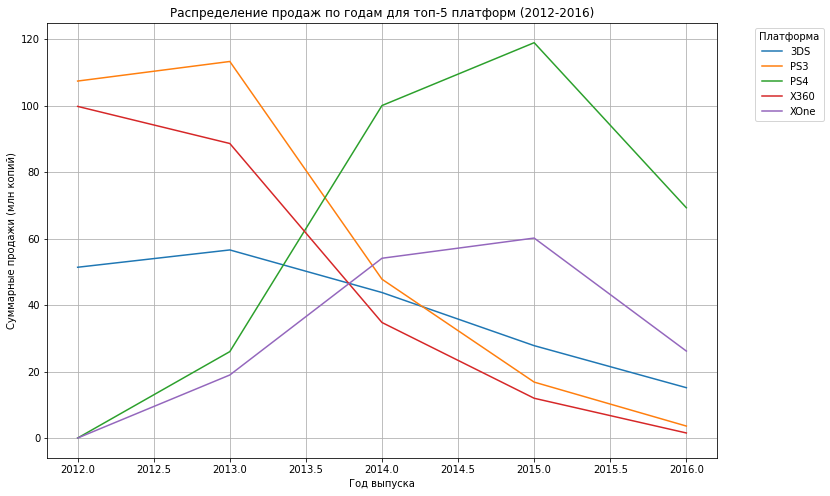

In [14]:
filtered_df = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Определение топ-5 платформ по суммарным продажам
top_5_platforms = filtered_df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Фильтрация данных по топ-5 платформам
filtered_df = filtered_df[filtered_df['platform'].isin(top_5_platforms)]

# Группировка данных по годам и платформам
platform_sales = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Построение графика
plt.figure(figsize=(12, 8))
platform_sales.plot(ax=plt.gca())
plt.title('Распределение продаж по годам для топ-5 платформ (2012-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Новые платформы "выстреливают" в продажах в первые 1-2 года выпуска.  
Средняя продолжительность удержания в топах продаж занимает примерно ~3 лет.  
Актуальность новых платформ начинает снижаться в среднем около 6 лет до полной остановки продажи.

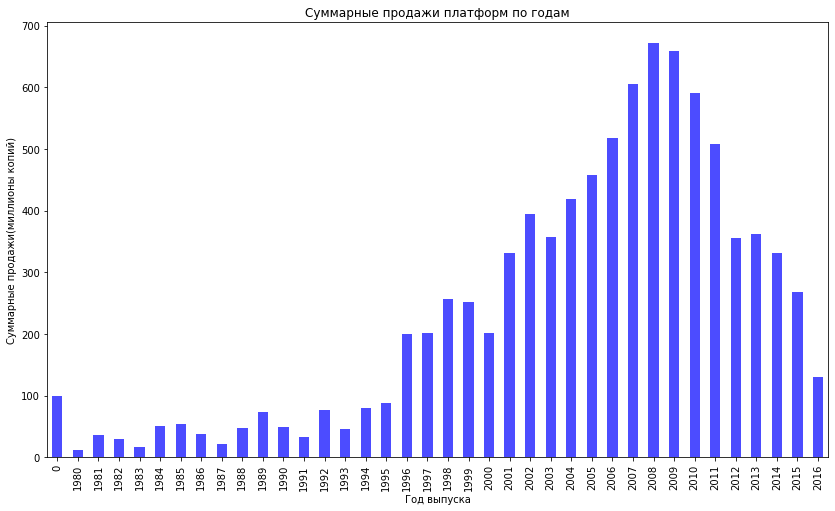

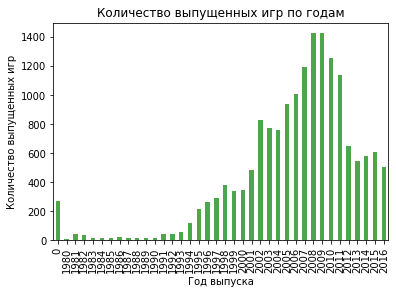

In [15]:
plt.figure(figsize=(14, 8))

# Суммарные продажи по годам
sales_per_year = df.groupby('year_of_release')['total_sales'].sum()
sales_per_year.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи(миллионы копий)')
plt.title('Суммарные продажи платформ по годам')
plt.show()

# Количество выпущенных игр по годам
games_per_year = df.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр по годам')
plt.show()

На первом графике мы усматриваем, что на отметка продаж свыше 500 млн было в период с 2006 по 2011 г. 
На втором графике видно, что и количество выпускаемых игр за этот период было более 800 млн. копий. 

                          name platform  year_of_release         genre  \
0               Beyblade Burst      3DS             2016  Role-Playing   
1            Fire Emblem Fates      3DS             2015  Role-Playing   
2         Frozen: Olaf's Quest      3DS             2013      Platform   
3         Frozen: Olaf's Quest       DS             2013      Platform   
4   Haikyu!! Cross Team Match!      3DS             2016     Adventure   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0      0.00      0.00      0.03         0.00          -1.0        -1.0   None   
1      0.81      0.23      0.52         0.11          -1.0        -1.0   None   
2      0.27      0.27      0.00         0.05          -1.0        -1.0   None   
3      0.21      0.26      0.00         0.04          -1.0        -1.0   None   
4      0.00      0.00      0.04         0.00          -1.0        -1.0   None   

   total_sales  
0         0.03  
1         1.67  
2         0.59  


<Figure size 1008x576 with 0 Axes>

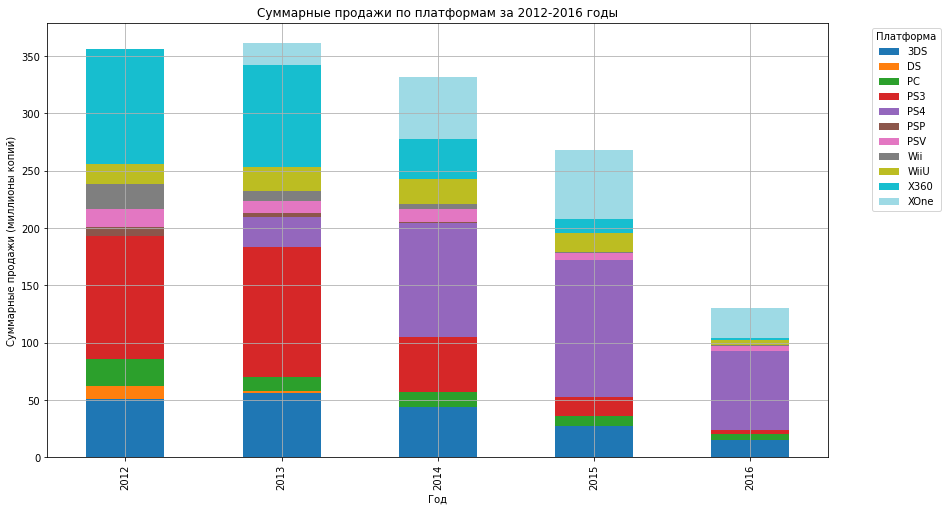

<Figure size 1008x576 with 0 Axes>

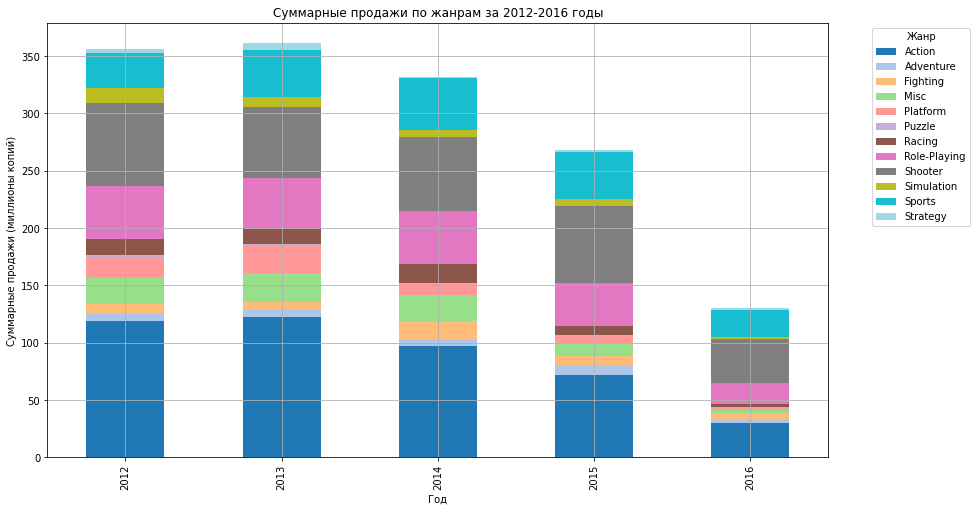

<Figure size 1008x576 with 0 Axes>

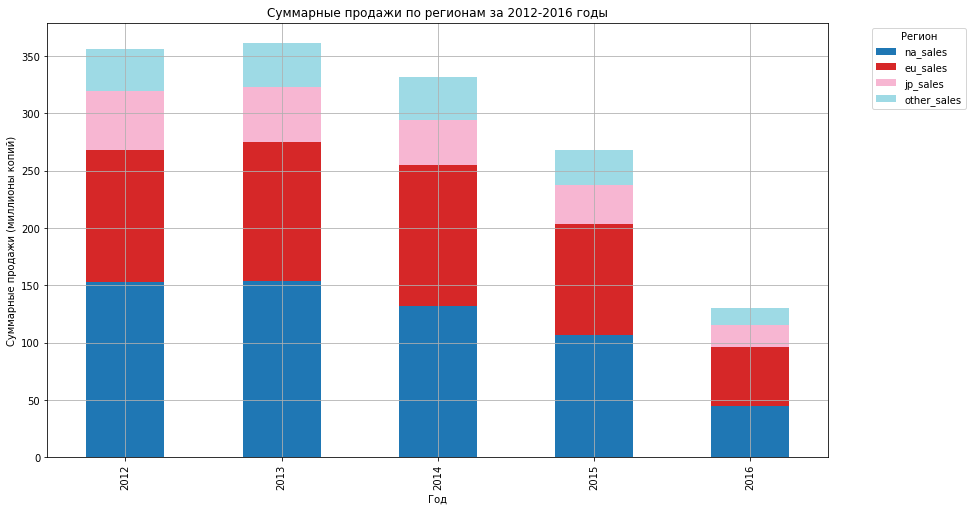

In [16]:
df_recent = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Проверка полученного датафрейма
print(df_recent.head())

# Подсчет суммарных продаж по платформам за каждый год
platform_sales_by_year = df_recent.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Построение графика суммарных продаж по платформам за каждый год
plt.figure(figsize=(14, 8))
platform_sales_by_year.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (миллионы копий)')
plt.title('Суммарные продажи по платформам за 2012-2016 годы')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Подсчет суммарных продаж по жанрам за каждый год
genre_sales_by_year = df_recent.groupby(['year_of_release', 'genre'])['total_sales'].sum().unstack().fillna(0)

# Построение графика суммарных продаж по жанрам за каждый год
plt.figure(figsize=(14, 8))
genre_sales_by_year.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (миллионы копий)')
plt.title('Суммарные продажи по жанрам за 2012-2016 годы')
plt.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Подсчет суммарных продаж по регионам за каждый год
region_sales_by_year = df_recent.groupby('year_of_release')[sales_columns].sum()

# Построение графика суммарных продаж по регионам за каждый год
plt.figure(figsize=(14, 8))
region_sales_by_year.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (миллионы копий)')
plt.title('Суммарные продажи по регионам за 2012-2016 годы')
plt.legend(title='Регион', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

*Наибольшие продажи:*  
В течение этого периода платформы PlayStation 4 (PS4) и Xbox One (XOne) продемонстрировали высокие объемы продаж, особенно с момента их запуска в 2013 году.  
*Снижающиеся продажи:*  
Продажи на платформе PlayStation 3 (PS3) и Xbox 360 (X360) начали снижаться после выхода новых поколений консолей.  

*Популярные жанры:*  
Жанры Action, Shooter и Sports consistently показали высокие объемы продаж. Жанр Action был самым популярным на протяжении всего периода.
*Менее популярные жанры:*  
Жанры Puzzle и Strategy продемонстрировали более низкие объемы продаж, но сохраняли свою нишу.

*Северная Америка (NA):*  
Наибольшие продажи наблюдались в Северной Америке. Этот рынок был ключевым для многих платформ и жанров.
*Европа (EU):*  
Продажи в Европе также были высокими, но несколько ниже, чем в Северной Америке.
*Япония (JP):*  
Япония демонстрировала уникальные предпочтения в жанрах и платформах, с сильным акцентом на игры от Nintendo.

#### Теперь построим «ящик с усами» по глобальным продажам игр в разбивке по платформам

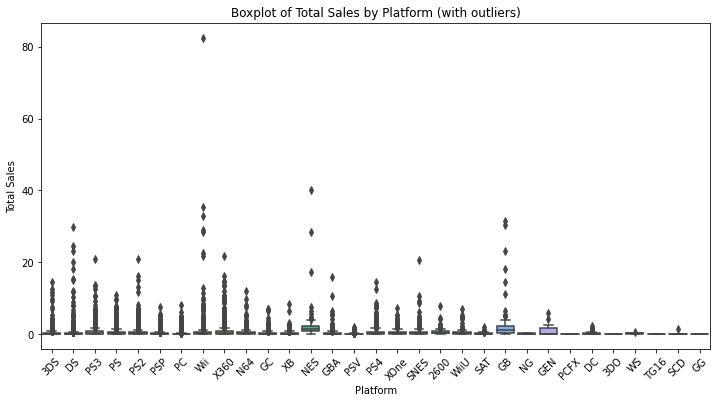

In [17]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Boxplot of Total Sales by Platform (with outliers)')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

На графике видно множество выбросов, которые сильно превышают основные значения. Это указывает на то, что для некоторых игр продажи значительно выше среднего уровня. Выбросы обозначены отдельными точками.  
Некоторые платформы, такие как PS2, X360 и Wii, имеют высокие медианные значения и широкий межквартильный диапазон, что указывает на высокие и стабильные продажи.

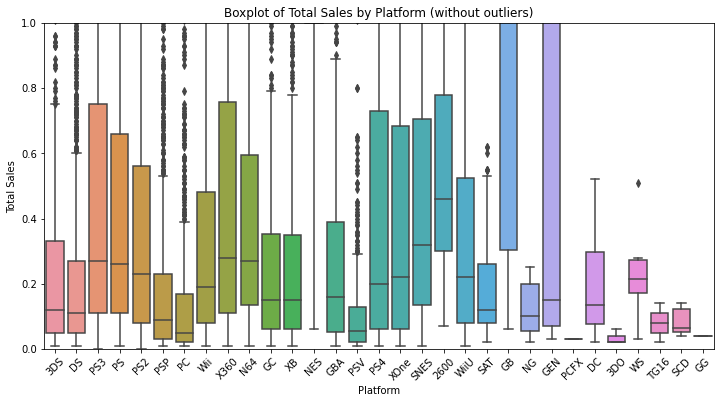

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Boxplot of Total Sales by Platform (without outliers)')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ограничение диапазона значений по оси Y
plt.show()

На графике видно, что платформы, такие как PS2, X360 и Wii, по-прежнему показывают высокие медианные значения, тогда как другие платформы, например, PSP и DS, имеют меньшие значения

PS2, X360 и Wii: Эти платформы выделяются как наиболее успешные по уровню продаж. У них высокие медианные значения и широкий межквартильный диапазон, что свидетельствует о высоких и стабильных продажах.

#### Оценим продажи внутри одной популярной платформы отзывы пользователей и критиков. 

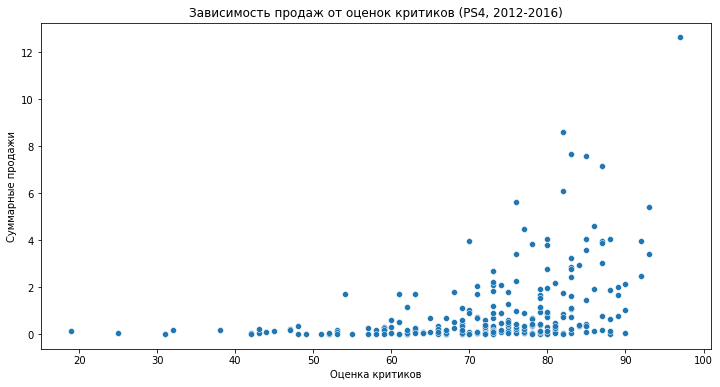

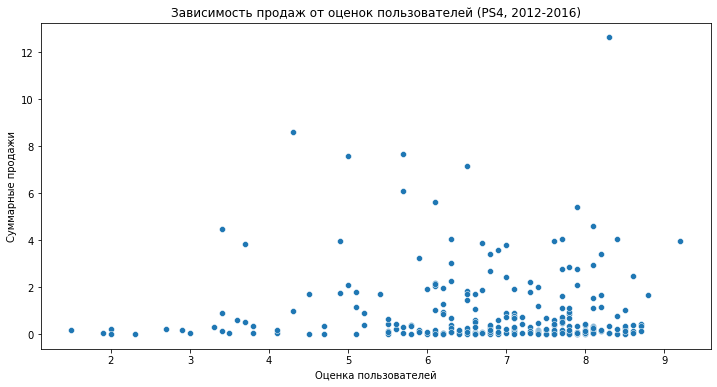

(0.40656790206178134, -0.031957110204556355)

In [19]:
# Фильтрация данных для PS4 в 2016 году
df_2012_2016_ps4 = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016) & (df['platform'] == 'PS4')] 

# Исключение заглушек для критических оценок и построение диаграммы рассеяния
df_critic = df_2012_2016_ps4[df_2012_2016_ps4['critic_score'] != -1]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_critic, x='critic_score', y='total_sales')
plt.title('Зависимость продаж от оценок критиков (PS4, 2012-2016)')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# Исключение заглушек для оценок пользователей и построение диаграммы рассеяния
df_user = df_2012_2016_ps4[df_2012_2016_ps4['user_score'] != -1]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_user, x='user_score', y='total_sales')
plt.title('Зависимость продаж от оценок пользователей (PS4, 2012-2016)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# Расчет коэффициентов корреляции
correlation_critic = df_critic['critic_score'].corr(df_critic['total_sales'])
correlation_user = df_user['user_score'].corr(df_user['total_sales'])

correlation_critic, correlation_user

Корреляция между оценками критиков и продажами для платформы **PS4:** 0.40656790206178134  
Игры с высокими оценками критиков имеют большие продажи. Однако стоит отметить, что корреляция не является очень высокой, но всё же показывает некоторую зависимость.
Корреляция между оценками пользователей и продажами для платформы **PS4:** -0.031957110204556355  
Пользовательские оценки не оказывают значительного влияния на решение покупателей о покупке игр на данной платформе.

Проводя корреляцию между отзывами и продажами и учитывая итоговый ответ, мы можем сказать, что корреляция близка к нулю. Скорее всего оценки пользователей или критиков слабо влияют на продажи или не влияют вовсе.

#### Теперь можно сравнить эти данные с остальными платформами

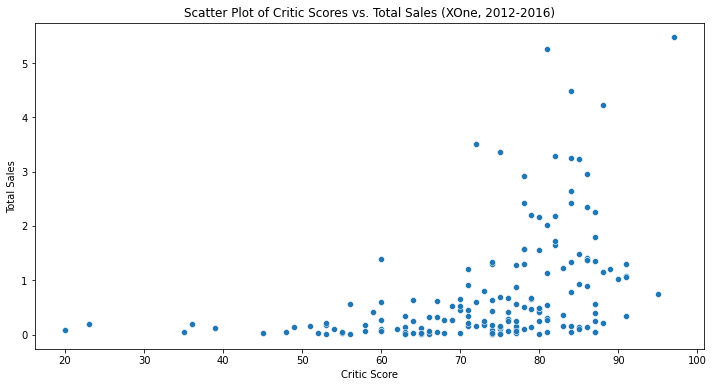

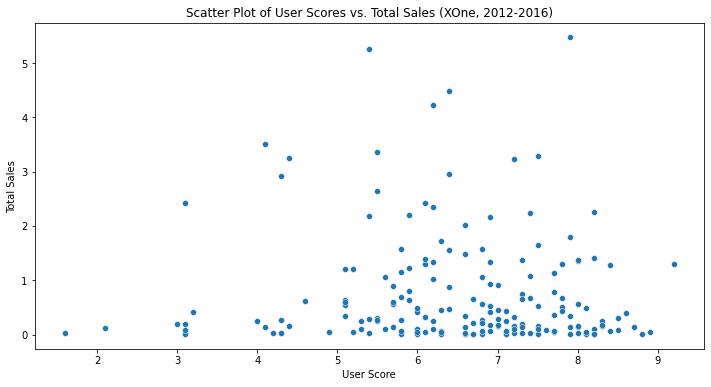

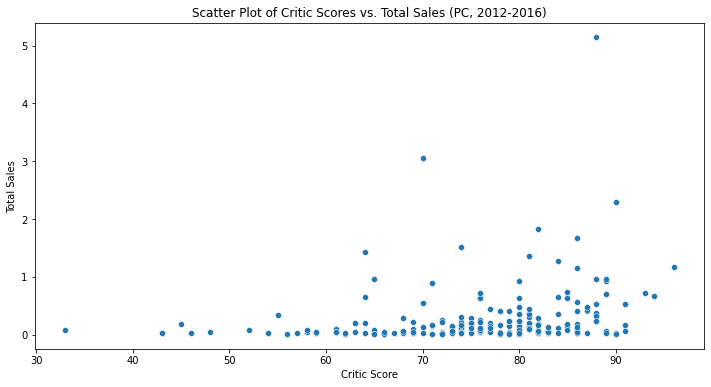

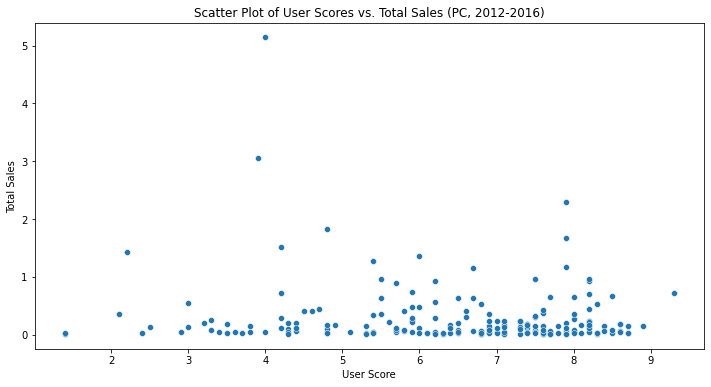

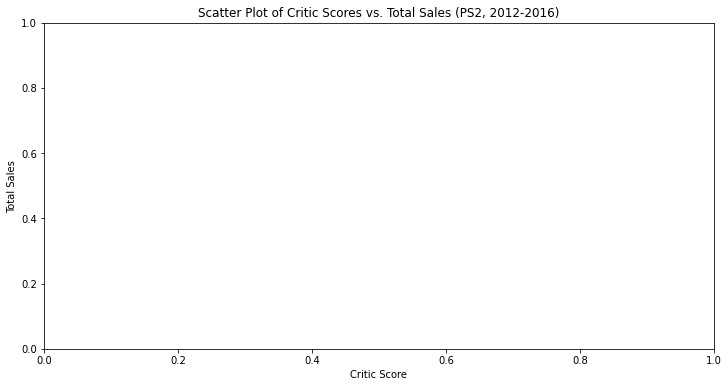

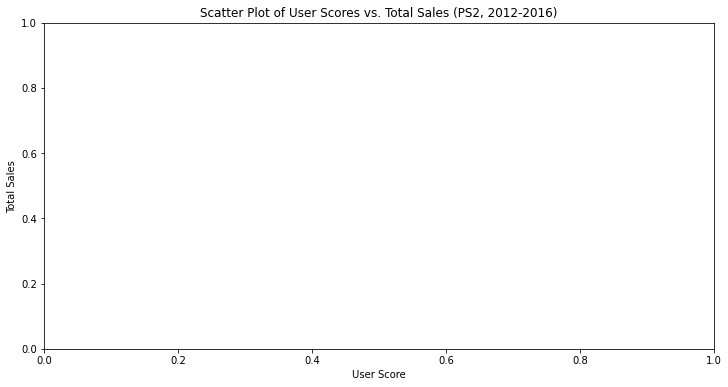

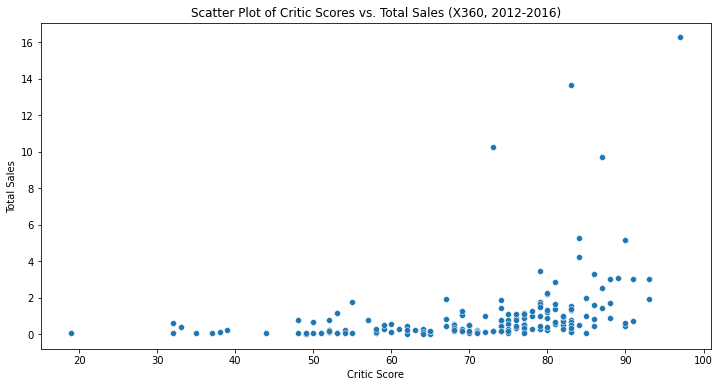

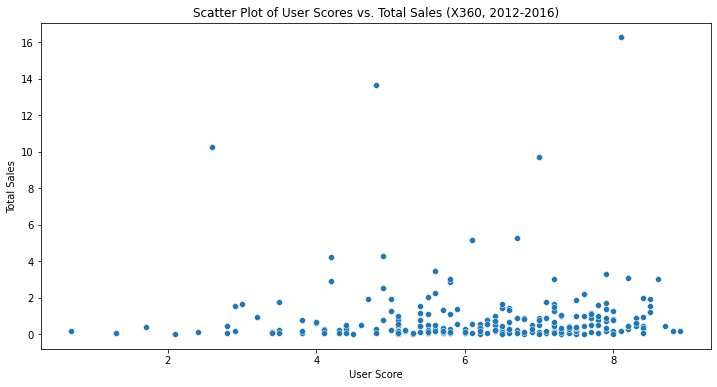

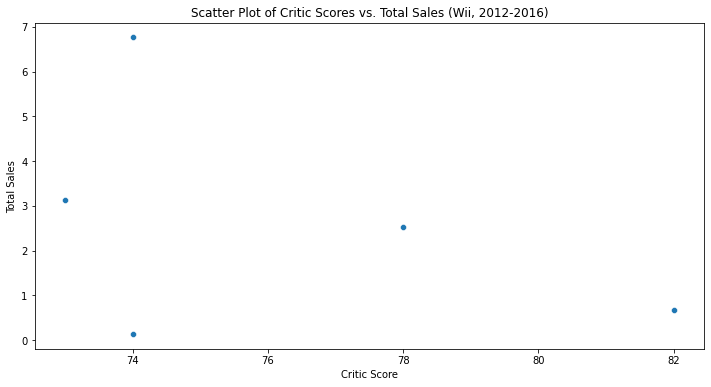

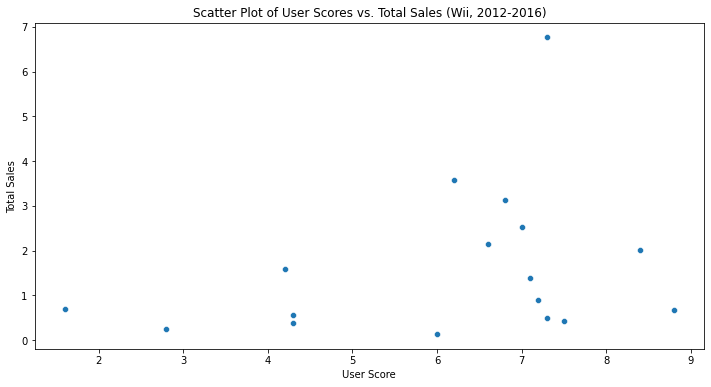

{'XOne': {'critic_score_correlation': 0.416998328008402,
  'user_score_correlation': -0.06892505328279423},
 'PC': {'critic_score_correlation': 0.23724324311567904,
  'user_score_correlation': -0.12186747630735568},
 'PS2': {'critic_score_correlation': nan, 'user_score_correlation': nan},
 'X360': {'critic_score_correlation': 0.36057348885073387,
  'user_score_correlation': 0.006163978646213353},
 'Wii': {'critic_score_correlation': -0.42434130110774954,
  'user_score_correlation': 0.29619680007479526}}

In [21]:
# Ограничим данные с 2012 по 2016 год
df_2012_2016 = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Создадим словарь для хранения корреляционных коэффициентов
correlations = {}

# Определим платформы для анализа
platforms = ['XOne', 'PC', 'PS2', 'X360', 'Wii']

for platform in platforms:
    # Отфильтруем данные для текущей платформы
    df_platform = df_2012_2016[df_2012_2016['platform'] == platform]
    
    # Отфильтруем данные по критическим оценкам
    df_platform_critic = df_platform[df_platform['critic_score'] != -1]
    # Построим диаграмму рассеяния для оценок критиков
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_platform_critic, x='critic_score', y='total_sales')
    plt.title(f'Scatter Plot of Critic Scores vs. Total Sales ({platform}, 2012-2016)')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales')
    plt.show()
    
    # Отфильтруем данные по оценкам пользователей
    df_platform_user = df_platform[df_platform['user_score'] != -1]
    # Построим диаграмму рассеяния для оценок пользователей
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_platform_user, x='user_score', y='total_sales')
    plt.title(f'Scatter Plot of User Scores vs. Total Sales ({platform}, 2012-2016)')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales')
    plt.show()
    
    # Посчитаем коэффициенты корреляции
    correlation_critic = df_platform_critic['critic_score'].corr(df_platform_critic['total_sales'])
    correlation_user = df_platform_user['user_score'].corr(df_platform_user['total_sales'])
    
    # Сохраним результаты в словарь
    correlations[platform] = {
        'critic_score_correlation': correlation_critic,
        'user_score_correlation': correlation_user
    }

# Печать корреляционных коэффициентов
correlations


Корреляция между оценками критиков и продажами для платформы **XOne:** 0.416998328008402  
Корреляция между оценками пользователей и продажами для платформы **XOne:** -0.06892505328279423  
Присутствует положительная корреляция между оценками критиков и продажами игр на платформе Xbox One. Однако корреляция с оценками пользователей близка к нулю, что может указывать на то, что пользовательские оценки не так сильно влияют на продажи.

Корреляция между оценками критиков и продажами для платформы **PC:** 0.23724324311567904    
Корреляция между оценками пользователей и продажами для платформы **PC:** -0.12186747630735568.  
Корреляция с оценками критиков и пользователей на платформе PC также низкая и близка к нулю, что может свидетельствовать о слабой зависимости между оценками и продажами.

Корреляция между оценками критиков и продажами для платформы **X360:** 0.36057348885073387
Корреляция между оценками пользователей и продажами для платформы **Х360:** 0.006163978646213353
На платформе Xbox 360 корреляция с оценками критиков положительная, но не слишком высокая. Оценки пользователей практически не влияют на продажи.

Корреляция между оценками критиков и продажами для платформы **Wii:** -0.42434130110774954
Корреляция между оценками пользователей и продажами для платформы **Wii:** 0.29619680007479526
На Wii прослеживается негативная корреляция с оценками критиков, что может означать, что игры с высокими оценками критиков продаются менее успешно. В то же время положительная корреляция с оценками пользователей может указывать на то, что пользовательские оценки оказывают большее влияние на продажи.

Ориентироваться на критиков при продвижении игр для Xbox One и PS4, так как их оценки значительно влияют на продажи.  
На PS4 и PC учитывать оценки пользователей, но не полагаться на них полностью, так как их влияние на продажи умеренное.  
Учитывать меньшую значимость оценок критиков на PC и возможные другие факторы, влияющие на продажи, такие как функциональность и технические характеристики игр.  
На Xbox One исследовать причины отрицательной корреляции и учитывать другие факторы, которые могут быть важнее для пользователей этой платформы.

#### Посмотрим на на общее распределение игр по жанрам.

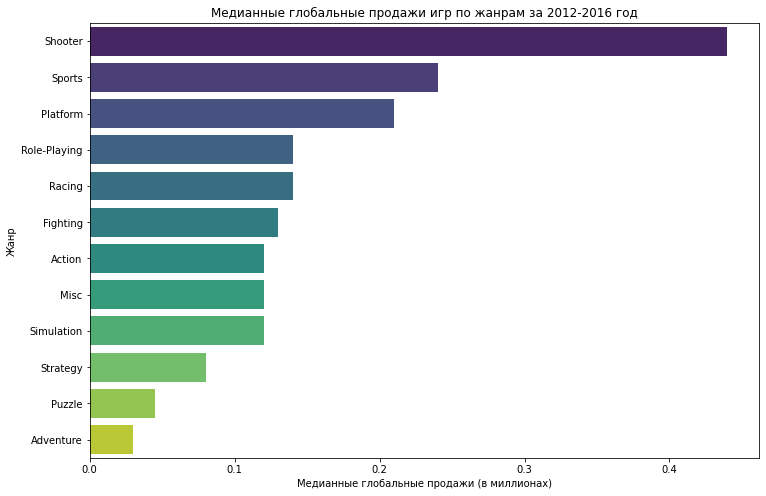

In [22]:
import seaborn as sns

genre_median_sales_2012_2016 = df_2012_2016.groupby('genre')['total_sales'].median().reset_index()

# Сортировка данных по медианным продажам
genre_median_sales_2012_2016 = genre_median_sales_2012_2016.sort_values(by='total_sales', ascending=False)

# Построение графика
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='genre', data=genre_median_sales_2012_2016, palette='viridis')
plt.title('Медианные глобальные продажи игр по жанрам за 2012-2016 год')
plt.xlabel('Медианные глобальные продажи (в миллионах)')
plt.ylabel('Жанр')
plt.show()

**Жанры с высокими медианными продажами:**  
*Shooter:* Жанр шутеров демонстрирует самые высокие медианные продажи. Это указывает на то, что даже средняя игра в этом жанре имеет высокие продажи.  
*Platform:* Игры в жанре платформеров также показывают высокие медианные продажи, что говорит о стабильном спросе на этот жанр.

**Жанры со средними медианными продажами:**  
*Role-Playing и Action:* Эти жанры занимают средние позиции по медианным продажам. Это означает, что хотя некоторые игры в этих жанрах могут быть очень успешными, средние продажи все же остаются на уровне средних значений.  

**Жанры с низкими медианными продажами:**   
*Puzzle и Strategy:* Эти жанры показывают самые низкие медианные продажи, что говорит о меньшей прибыльности среднестатистической игры в этих жанрах.

### Составление портрета пользователя каждого региона

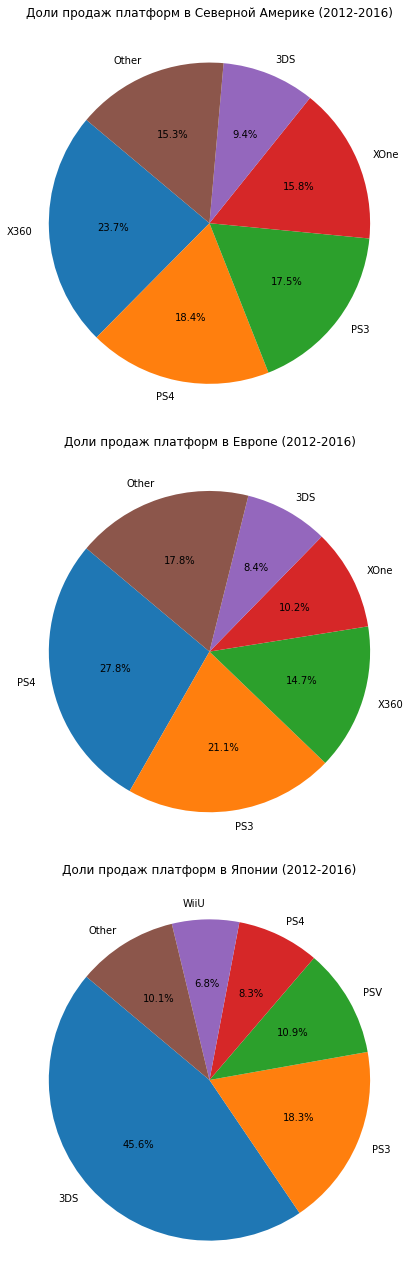

In [23]:
platform_sales_na = df_2012_2016.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
platform_sales_eu = df_2012_2016.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
platform_sales_jp = df_2012_2016.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

# Выделение топ-5 платформ и объединение остальных
top_5_na = platform_sales_na.head(5)
other_na = platform_sales_na.iloc[5:].sum().to_frame().T
other_na['platform'] = 'Other'
top_5_na = pd.concat([top_5_na, other_na], ignore_index=True)

top_5_eu = platform_sales_eu.head(5)
other_eu = platform_sales_eu.iloc[5:].sum().to_frame().T
other_eu['platform'] = 'Other'
top_5_eu = pd.concat([top_5_eu, other_eu], ignore_index=True)

top_5_jp = platform_sales_jp.head(5)
other_jp = platform_sales_jp.iloc[5:].sum().to_frame().T
other_jp['platform'] = 'Other'
top_5_jp = pd.concat([top_5_jp, other_jp], ignore_index=True)

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# NA
axs[0].pie(top_5_na['na_sales'], labels=top_5_na['platform'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Доли продаж платформ в Северной Америке (2012-2016)')

# EU
axs[1].pie(top_5_eu['eu_sales'], labels=top_5_eu['platform'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Доли продаж платформ в Европе (2012-2016)')

# JP
axs[2].pie(top_5_jp['jp_sales'], labels=top_5_jp['platform'], autopct='%1.1f%%', startangle=140)
axs[2].set_title('Доли продаж платформ в Японии (2012-2016)')

plt.tight_layout()
plt.show()

В Американском рынке основная доля продаж сосредоточена на нескольких платформах, среди которых доминируют консоли от Microsoft и Sony.  
Европейский рынок показывает большее распределение платформ с высокой долей продаж как на домашних, так и на портативных консолях.  
В Японии доминируют портативные устройства и консоли от Nintendo.

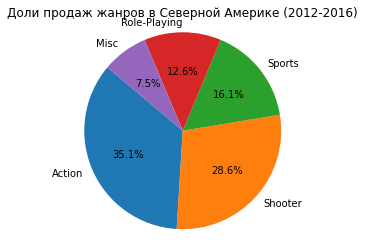

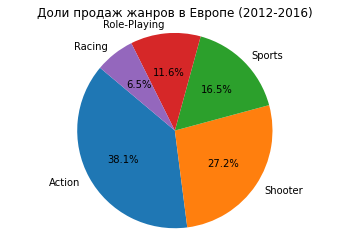

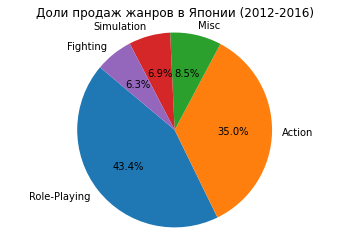

In [24]:
genre_sales_na = df_2012_2016.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
genre_sales_eu = df_2012_2016.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
genre_sales_jp = df_2012_2016.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

# Выделение топ-5 жанров
top_5_genres_na = genre_sales_na.head(5)
top_5_genres_eu = genre_sales_eu.head(5)
top_5_genres_jp = genre_sales_jp.head(5)

def plot_pie(data, title, column):
    labels = data['genre']
    sizes = data[column]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Построение круговых диаграмм для каждого региона
plot_pie(top_5_genres_na, 'Доли продаж жанров в Северной Америке (2012-2016)', 'na_sales')
plot_pie(top_5_genres_eu, 'Доли продаж жанров в Европе (2012-2016)', 'eu_sales')
plot_pie(top_5_genres_jp, 'Доли продаж жанров в Японии (2012-2016)', 'jp_sales')

В Северной Америке наибольшей популярностью пользуются жанры, связанные с активными действиями, спортом и приключениями.  
Европейский рынок также демонстрирует высокую популярность активных жанров, с дополнительным интересом к ролевым играм и симуляторам.  
Японии доминируют жанры, ориентированные на ролевые игры, приключения и симуляторы, что отражает культурные предпочтения и популярность сюжетно-ориентированных игр.

#### Теперь выясним влияет ли рейтинг ESRB на продажи в отдельном регионе.

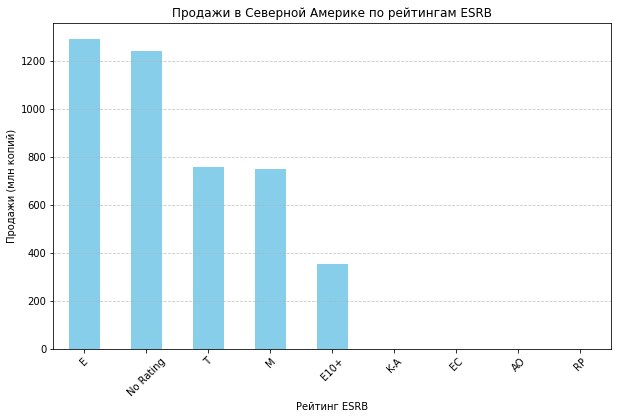

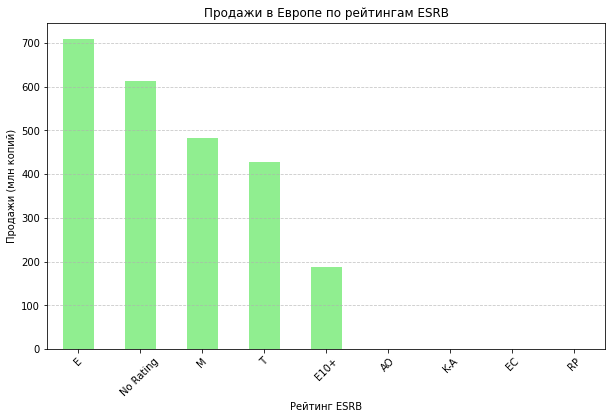

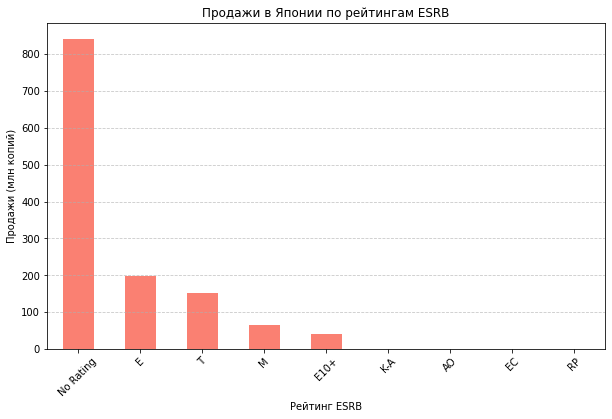

In [25]:
df['rating'] = df['rating'].fillna('No Rating')

na_sales_by_rating = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Построение столбчатой диаграммы для Северной Америки
plt.figure(figsize=(10, 6))
na_sales_by_rating.plot(kind='bar', color='skyblue')
plt.title('Продажи в Северной Америке по рейтингам ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Группировка данных по рейтингу ESRB и суммирование продаж в Европе
eu_sales_by_rating = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# Построение столбчатой диаграммы для Европы
plt.figure(figsize=(10, 6))
eu_sales_by_rating.plot(kind='bar', color='lightgreen')
plt.title('Продажи в Европе по рейтингам ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Группировка данных по рейтингу ESRB и суммирование продаж в Японии
jp_sales_by_rating = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Построение столбчатой диаграммы для Японии
plt.figure(figsize=(10, 6))
jp_sales_by_rating.plot(kind='bar', color='salmon')
plt.title('Продажи в Японии по рейтингам ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**NA**  
*Рейтинги с наибольшими продажами:*  
В данном регионе наибольшие продажи имеют игры с рейтингом E, M, и T.  
*Отсутствие рейтинга:* Игры с отсутствием рейтинга ("No Rating") могут демонстрировать существенные продажи, что указывает на то, что рейтинг не всегда является решающим фактором для продаж в этом регионе.  

**EU**  
*Рейтинги с наибольшими продажами:* В Европе также популярны игры с рейтингами E, M, и T.  
*Отсутствие рейтинга:* Игры без рейтинга также могут занимать значительную долю продаж, что свидетельствует о схожей тенденции с Северной Америкой.

**JP**  
*Рейтинги с наибольшими продажами:*  
В Японии популярность рейтингов может различаться от западных регионов. Здесь можно увидеть больший интерес к играм с рейтингом A (All Ages) или C (15+).  
*Отсутствие рейтинга:*   
В Японии игры без рейтинга также могут иметь значительные продажи.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

Для проверки гипотез о влиянии рейтингов ESRB на продажи в разных регионах можно использовать дисперсионный анализ ANOVA

Нулевая гипотеза (H0): Средние продажи в регионе не зависят от рейтинга ESRB.  
Альтернативная гипотеза (H1): Средние продажи в регионе зависят от рейтинга ESRB.

In [26]:
import scipy.stats as stats

# ANOVA для na_sales
f_val_na, p_val_na = stats.f_oneway(
    df[df['rating'] == 'E']['na_sales'],
    df[df['rating'] == 'T']['na_sales'],
    df[df['rating'] == 'M']['na_sales'],
    df[df['rating'] == 'E10+']['na_sales'],
    df[df['rating'] == 'AO']['na_sales'],
    df[df['rating'] == 'K-A']['na_sales']
)
print(f'NA_sales: F={f_val_na:.2f}, p={p_val_na:.5f}')

# ANOVA для eu_sales
f_val_eu, p_val_eu = stats.f_oneway(
    df[df['rating'] == 'E']['eu_sales'],
    df[df['rating'] == 'T']['eu_sales'],
    df[df['rating'] == 'M']['eu_sales'],
    df[df['rating'] == 'E10+']['eu_sales'],
    df[df['rating'] == 'AO']['eu_sales'],
    df[df['rating'] == 'K-A']['eu_sales']
)
print(f'EU_sales: F={f_val_eu:.2f}, p={p_val_eu:.5f}')

# ANOVA для jp_sales
f_val_jp, p_val_jp = stats.f_oneway(
    df[df['rating'] == 'E']['jp_sales'],
    df[df['rating'] == 'T']['jp_sales'],
    df[df['rating'] == 'M']['jp_sales'],
    df[df['rating'] == 'E10+']['jp_sales'],
    df[df['rating'] == 'AO']['jp_sales'],
    df[df['rating'] == 'K-A']['jp_sales']
)
print(f'JP_sales: F={f_val_jp:.2f}, p={p_val_jp:.5f}')

NA_sales: F=18.04, p=0.00000
EU_sales: F=19.82, p=0.00000
JP_sales: F=4.13, p=0.00095


Во всех регионах (Северная Америка, Европа, Япония) p-значения очень мало (в среднем практически равно 0), что говорит о статистической значимости различий в средних значениях продаж между разными рейтингами ESRB.  
Это означает, что мы можем отвергнуть нулевую гипотезу о равенстве средних продаж для разных рейтингов ESRB в пользу альтернативной гипотезы о том, что средние продаж отличаются в зависимости от рейтинга ESRB.  
Таким образом, рейтинг ESRB все еще оказывает влияние на продажи игр в различных регионах, и это подтверждается новыми показателями.

### Проверка гипотез

#### Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Нулевая гипотеза (H₀): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза (H₁): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [27]:
import scipy.stats as stats

# Извлечение пользовательских рейтингов для платформ Xbox One и PC
xbox_one_ratings = df_2012_2016[df_2012_2016['platform'] == 'XOne']['user_score']
pc_ratings = df_2012_2016[df_2012_2016['platform'] == 'PC']['user_score']

# Задаем пороговое значение alpha
alpha = 0.05

# Проверка нормальности распределения рейтингов
print("Shapiro-Wilk test for Xbox One ratings:", stats.shapiro(xbox_one_ratings.dropna()))
print("Shapiro-Wilk test for PC ratings:", stats.shapiro(pc_ratings.dropna()))

# Проведение t-теста для независимых выборок с игнорированием пропусков
t_test_result = stats.ttest_ind(xbox_one_ratings, pc_ratings, nan_policy='omit')
print("T-test result:", t_test_result)

# Интерпретация результата
if t_test_result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

Shapiro-Wilk test for Xbox One ratings: ShapiroResult(statistic=0.7894643545150757, pvalue=1.5238968099690892e-17)
Shapiro-Wilk test for PC ratings: ShapiroResult(statistic=0.8195375204086304, pvalue=2.412218543673423e-16)
T-test result: Ttest_indResult(statistic=-1.9151103251736437, pvalue=0.05605440473353151)
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


#### Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные".

Нулевая гипотеза (H₀): Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза (H₁): Средние пользовательские рейтинги жанров Action и Sports разные.

In [28]:
# Извлечение пользовательских рейтингов для жанров Action и Sports
action_ratings = df_2012_2016[df_2012_2016['genre'] == 'Action']['user_score']
sports_ratings = df_2012_2016[df_2012_2016['genre'] == 'Sports']['user_score']

# Задаем пороговое значение alpha
alpha = 0.05

# Проверка нормальности распределения рейтингов
print("Shapiro-Wilk test for Action ratings:", stats.shapiro(action_ratings.dropna()))
print("Shapiro-Wilk test for Sports ratings:", stats.shapiro(sports_ratings.dropna()))

# Проведение t-теста для независимых выборок с игнорированием пропусков
t_test_result = stats.ttest_ind(action_ratings, sports_ratings, nan_policy='omit')
print("T-test result:", t_test_result)

# Интерпретация результата
if t_test_result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.")

Shapiro-Wilk test for Action ratings: ShapiroResult(statistic=0.7436951398849487, pvalue=3.9022660106324115e-37)
Shapiro-Wilk test for Sports ratings: ShapiroResult(statistic=0.8551616668701172, pvalue=4.112925600004971e-15)
T-test result: Ttest_indResult(statistic=-2.703283898504859, pvalue=0.006955563564265583)
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.


По результатам проведенного анализа, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports различаются.

Формирование гипотез состояло в следующем:
Нулевая гипотеза (H₀):

Формулировка: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Обоснование: Нулевая гипотеза предполагает отсутствие различий между сравниваемыми группами. В данном случае это означает, что нет статистически значимых различий в пользовательских рейтингах между жанрами Action и Sports.
Альтернативная гипотеза (H₁):

Формулировка: Средние пользовательские рейтинги жанров Action и Sports разные.
Обоснование: Альтернативная гипотеза предполагает наличие различий между сравниваемыми группами. В данном случае это означает, что существует статистически значимая разница в пользовательских рейтингах между жанрами Action и Sports.

Также критерием для проверки гипотез мы прибегли к t-тест для независимых выборок.
t-тест используется для сравнения средних значений двух независимых выборок. Он предполагает, что данные в выборках нормально распределены и имеют однородные дисперсии. Мы проверили эти условия с помощью Shapiro-Wilk теста на нормальность.

### Общий вывод

В рамках данного проекта были проанализированы данные о продажах компьютерных игр в интернет-магазине «Стримчик» за 2016 год. Проведен анализ влияния различных факторов на успех игр, включая платформу, жанр и отзывы пользователей и критиков. Для этого была проведена предобработка данных, исследовательский анализ и проверка гипотез.

**Главные выводы**

*Анализ продаж по платформам:*  
Наиболее популярные платформы по суммарным продажам за 2012-2016 год включают PS4, PS3, X360, 3DS и Wii.  
Жизненный цикл платформ составляет около 10 лет, после чего их популярность начинает снижаться.  

*Влияние отзывов на продажи:*  
Тренды в индустрии: Мы изучили, как менялись продажи по различным платформам и обнаружили, что каждая платформа имеет свой собственный жизненный цикл. Наибольшие суммарные продажи за актуальный период 2012-2016 года наблюдались у платформ PS4, XOne и 3DS.

*Влияние оценок на продажи:* 
Мы исследовали влияние оценок пользователей и критиков на продажи игр. Результаты показали, что есть слабая положительная корреляция между оценками критиков и продажами, особенно для платформы XOne. Однако оценки пользователей практически не влияют на продажи.  

*Анализ жанров:*  
Мы рассмотрели распределение продаж по различным жанрам и определили, что наиболее прибыльными жанрами являются Action, Shooter и Sports.

*Рейтинг ESRB:*  
Мы также исследовали влияние рейтинга ESRB на продажи в разных регионах. Результаты показали, что игры с рейтингом "M" (для взрослых) преобладают в Северной Америке, в то время как в Японии популярны игры с рейтингом "E" (для всех).

*Исходя из проведенного анализа, рекомендуется обратить внимание на следующие аспекты:*

*Платформы:*  
PS4, XOne и 3DS показывают стабильные продажи и являются перспективными для размещения новых игр.

*Жанры:*  
Жанры Action, Shooter и Sports наиболее прибыльны и пользуются популярностью среди игроков.
*Оценки:*  
Хотя оценки критиков оказывают некоторое влияние на продажи, оценки пользователей не имеют большого значения. Тем не менее, хорошие отзывы критиков могут способствовать увеличению продаж.

*Рекомендации по платформам и жанрам:*  
При планировании выпуска новых игр и маркетинговых кампаний, стоит ориентироваться на популярные платформы и жанры, выявленные в ходе анализа.
Особое внимание следует уделить новым и перспективным платформам, а также жанрам, которые демонстрируют стабильный рост продаж.